# 분류 문제

In [2]:
# 분류 ANN을 위한 인공지능 모델 구현
from tensorflow.keras import layers, models

In [3]:
# 분산 방식 모델링을 표현하는 함수형 구현
def ANN_models_func(Nin, Nh, Nout):
    x = layers.Input(shape=(Nin,))
    h = layers.Activation('relu')(layers.Dense(Nh)(x))
    y = layers.Activation('softmax')(layers.Dense(Nout)(h))
    model = models.Model(x, y)
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    return model

# 연쇄 방식 모델링을 포함하는 함수형 구현
def ANN_seq_func(Nin, Nh, Nout):
    model = models.Sequential()
    model.add(layers.Dense(Nh, activation='relu', input_shape=(Nin,)))
    model.add(layers.Dense(Nout, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    return model

# 분산 방식 모델링을 포함하는 객체지향형 구현
class ANN_models_class(models.Model):
    def __init__(self, Nin, Nh, Nout):
        # Prepare network layers and activation functions
        hidden = layers.Dense(Nh)
        output = layers.Dense(Nout)
        relu = layers.Activation('relu')
        softmax = layers.Activation('softmax')

        # Connect network elements
        x = layers.Input(shape=(Nin,))
        h = relu(hidden(x))
        y = softmax(output(h))

        super().__init__(x, y)
        self.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 연쇄 방식 모델링을 포함하는 객체지향형 구현
class ANN_seq_class(models.Sequential):
    def __init__(self, Nin, Nh, Nout):
        super().__init__()
        self.add(layers.Dense(Nh, activation='relu', input_shape=(Nin,)))
        self.add(layers.Dense(Nout, activation='softmax'))
        self.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [4]:
# 분류 ANN에 사용할 데이터 불러오기
import numpy as np
from tensorflow.keras import datasets, utils

In [5]:
def Data_func():
    (X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

    Y_train = utils.to_categorical(y_train)
    Y_test = utils.to_categorical(y_test)
    
    L, W, H = X_train.shape
    X_train = X_train.reshape(-1, W * H)
    X_test = X_test.reshape(-1, W * H)

    X_train = X_train / 255.0
    X_test = X_test / 255.0

    return (X_train, Y_train), (X_test, Y_test)

In [6]:
%run 'drive/MyDrive/Colab Notebooks/Keras/plot_history.ipynb'

In [7]:
Nin = 784
Nh = 100
number_of_class = 10
Nout = number_of_class

model = ANN_seq_class(Nin, Nh, Nout)
(X_train, Y_train), (X_test, Y_test) = Data_func()

# Training
history = model.fit(X_train, Y_train, epochs=15,
                    batch_size=100, validation_split=0.2)
performance_test = model.evaluate(X_test, Y_test, batch_size=100)
print('Test Loss and Accuracy ->', performance_test)

11493376/11490434 [==============================] - 0s 0us/step
Epoch 1/15
480/480 [==============================] - 2s 4ms/step - loss: 0.3850 - accuracy: 0.8952 - val_loss: 0.2165 - val_accuracy: 0.9397
Epoch 2/15
480/480 [==============================] - 2s 4ms/step - loss: 0.1902 - accuracy: 0.9455 - val_loss: 0.1620 - val_accuracy: 0.9553
Epoch 3/15
480/480 [==============================] - 2s 4ms/step - loss: 0.1402 - accuracy: 0.9591 - val_loss: 0.1383 - val_accuracy: 0.9605
Epoch 4/15
480/480 [==============================] - 2s 3ms/step - loss: 0.1087 - accuracy: 0.9692 - val_loss: 0.1263 - val_accuracy: 0.9627
Epoch 5/15
480/480 [==============================] - 2s 3ms/step - loss: 0.0896 - accuracy: 0.9740 - val_loss: 0.1183 - val_accuracy: 0.9654
Epoch 6/15
480/480 [==============================] - 2s 3ms/step - loss: 0.0745 - accuracy: 0.9786 - val_loss: 0.1024 - val_accuracy: 0.9687
Epoch 7/15
480/480 [==============================] - 2s 4ms/step - loss: 0.0634 - 

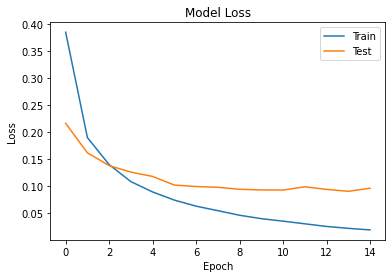

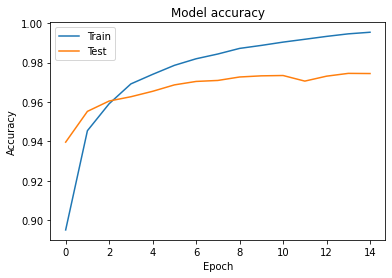

In [8]:
plot_loss(history)
plt.show()
plot_acc(history)
plt.show()

# 회귀 문제

In [9]:
# 회귀 ANN 모델링
class ANN(models.Model):
    def __init__(self, Nin, Nh, Nout):
        # Prepare network layers and activate functions
        hidden = layers.Dense(Nh)
        output = layers.Dense(Nout)
        relu = layers.Activation('relu')

        # Connect network elements
        x = layers.Input(shape=(Nin,))
        h = relu(hidden(x))
        y = output(h)

        super().__init__(x, y)

        self.compile(loss='mse', optimizer='sgd')

In [10]:
# 학습과 평가용 데이터 불러오기
from sklearn import preprocessing

def Data_func():
    (X_train, y_train), (X_test, y_test) = datasets.boston_housing.load_data()
    scaler = preprocessing.MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    return (X_train, y_train), (X_test, y_test)

In [11]:
Nin = 13
Nh = 5
Nout = 1

model = ANN(Nin, Nh, Nout)
(X_train, y_train), (X_test, y_test) = Data_func()

history = model.fit(X_train, y_train, epochs=100,
                    batch_size=100, validation_split=0.2,
                    verbose=2)

performance_test = model.evaluate(X_test, y_test, batch_size=100)
print('\nTest Loss -> {:.2f}'.format(performance_test))

57344/57026 [==============================] - 0s 0us/step
Epoch 1/100
4/4 - 0s - loss: 567.3033 - val_loss: 561.6304
Epoch 2/100
4/4 - 0s - loss: 469.3448 - val_loss: 384.7888
Epoch 3/100
4/4 - 0s - loss: 215.7552 - val_loss: 145.3347
Epoch 4/100
4/4 - 0s - loss: 106.6336 - val_loss: 103.9120
Epoch 5/100
4/4 - 0s - loss: 78.3703 - val_loss: 73.2581
Epoch 6/100
4/4 - 0s - loss: 65.6430 - val_loss: 69.3082
Epoch 7/100
4/4 - 0s - loss: 61.4326 - val_loss: 59.0678
Epoch 8/100
4/4 - 0s - loss: 52.2492 - val_loss: 60.1857
Epoch 9/100
4/4 - 0s - loss: 49.8873 - val_loss: 50.7839
Epoch 10/100
4/4 - 0s - loss: 46.5808 - val_loss: 67.2030
Epoch 11/100
4/4 - 0s - loss: 67.4911 - val_loss: 45.9908
Epoch 12/100
4/4 - 0s - loss: 42.4242 - val_loss: 46.9780
Epoch 13/100
4/4 - 0s - loss: 40.8735 - val_loss: 51.3615
Epoch 14/100
4/4 - 0s - loss: 48.3760 - val_loss: 43.5071
Epoch 15/100
4/4 - 0s - loss: 39.9742 - val_loss: 62.4955
Epoch 16/100
4/4 - 0s - loss: 60.1800 - val_loss: 61.6393
Epoch 17/100
4

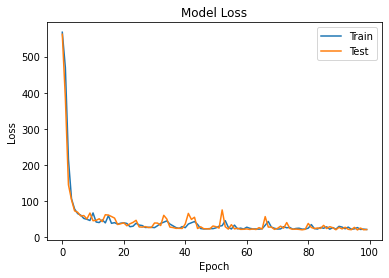

In [12]:
plot_loss(history)
plt.show()